<a href="https://colab.research.google.com/github/Yashkaka/Student_Marks_prediction/blob/main/Task1_student_score.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Task 1 : Prediction using Supervised Model(Linear Regression)**
### **Author: Yash Kaka**

**Perform exploratory Data Analysis on Dataset "students" to predict the percentage of the marks of the students based on the numbers of hours they studied.**

In [1]:
# importing the needed libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
from sklearn import metrics


In [2]:
#reading the data
data=pd.read_csv("http://bit.ly/w-data")
print("data imported succesfully")

data imported succesfully


In [5]:
(data.head(10))

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


In [8]:
#get more understanding of the dataset
data.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [13]:
data.isnull().sum()



Hours     0
Scores    0
dtype: int64

**There is no null values in the dataset**

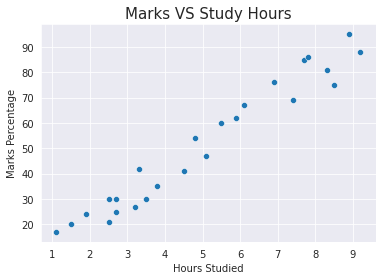

In [31]:
sns.set_style('darkgrid')
sns.scatterplot(data=data,x="Hours",y="Scores")
plt.title("Marks VS Study Hours",size=15)
plt.xlabel("Hours Studied",size=10)
plt.ylabel("Marks Percentage",size=10)
plt.show()

**Preparing the Data**

In [91]:
# defining x and y from data
X=data.iloc[:,:-1].values
Y=data.iloc[:,1].values

In [92]:
# Splitting the data into 2
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.2,random_state=0)

**Fitting the data into model**

In [93]:
regression=LinearRegression()
regression.fit(X_train,Y_train)
print("training Complete")

training Complete


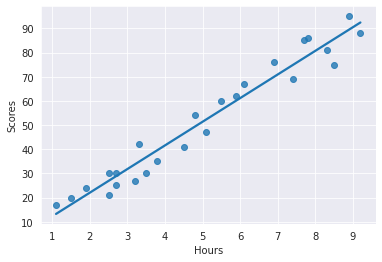

In [94]:
sns.regplot(x = "Hours",y = "Scores", ci = None,data = data)

**Predicting the percentage of marks**

In [96]:
print(X_test)
pred_Y=regression.predict(X_test)


[[1.5]
 [3.2]
 [7.4]
 [2.5]
 [5.9]]


In [102]:
prediction=pd.DataFrame({'Hours':[i[0] for i in X_test],'predicted Marks':[j for j in pred_Y]})
prediction

,Hours,predicted Marks
0,1.5,16.884145
1,3.2,33.732261
2,7.4,75.357018
3,2.5,26.794801
4,5.9,60.491033


**Comparing the data with predicted marks**

In [98]:
df = pd.DataFrame({'Actual Marks': Y_test, 'Predicted Marks':  pred_Y})  
df 

,Actual,Predicted
0,20,16.884145
1,27,33.732261
2,69,75.357018
3,30,26.794801
4,62,60.491033


**Evaluating the method**

In [103]:
#calculating the mean absolute error

print("Mean absolute error :",mean_absolute_error(Y_test,pred_Y))

Mean absolute error : 4.183859899002982


**what will be the score of the student if he/she studies for 9.5 hrs/day?**

In [127]:
hours= [9.25]
sol = regression.predict([hours])
print("No of Hours = {}".format(hours[0]))
print("Predicted Score = {}".format(sol[0]))

No of Hours = 9.25
Predicted Score = 93.69173248737539
